In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.shape

(1000, 3)

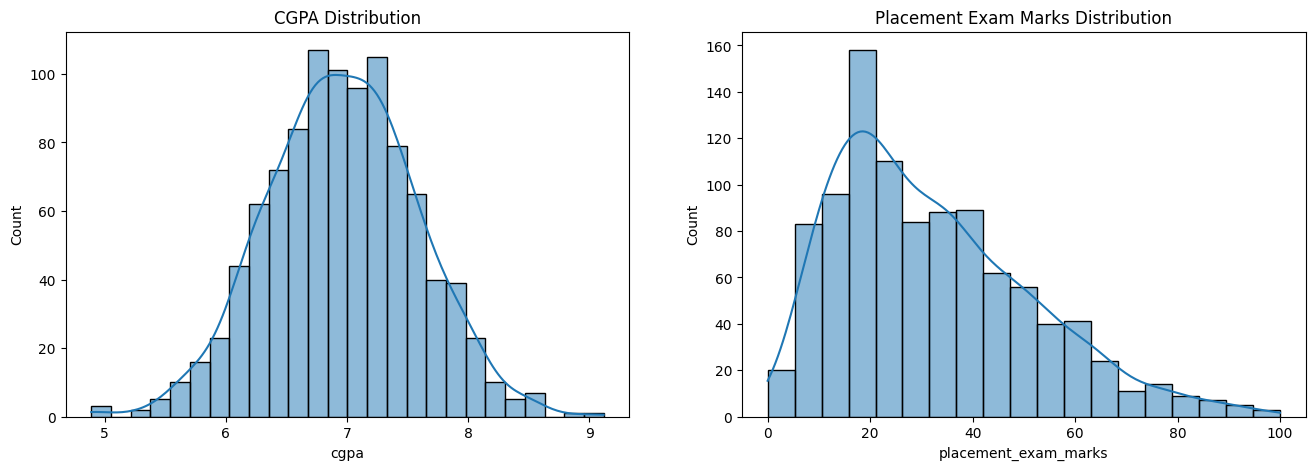

In [5]:
plt.figure(figsize=(16,5))


plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)
plt.title('CGPA Distribution')


plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.title('Placement Exam Marks Distribution')

plt.show()

In [6]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [7]:
df['cgpa'].skew()

-0.014529938929314918

<Axes: ylabel='placement_exam_marks'>

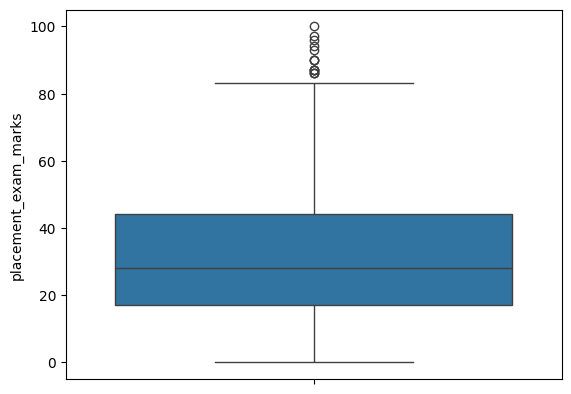

In [8]:
sns.boxplot(df['placement_exam_marks'])

In [9]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [10]:
iqr = percentile75 - percentile25

In [11]:
upper_limit = percentile75+1.5*iqr
lower_limit  = percentile25-1.5*iqr

In [12]:
print(upper_limit)
print(lower_limit)

84.5
-23.5


### Finding Outliers

In [13]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [14]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


### Trimmming

In [15]:
new_df = df[df['placement_exam_marks']<upper_limit]

<Axes: ylabel='placement_exam_marks'>

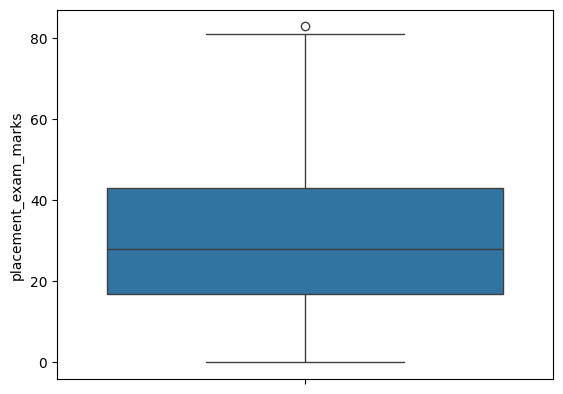

In [16]:
sns.boxplot(new_df['placement_exam_marks'])

### Capping

In [17]:
new_df_cap = df.copy()

In [18]:
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks']<lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

<Axes: ylabel='placement_exam_marks'>

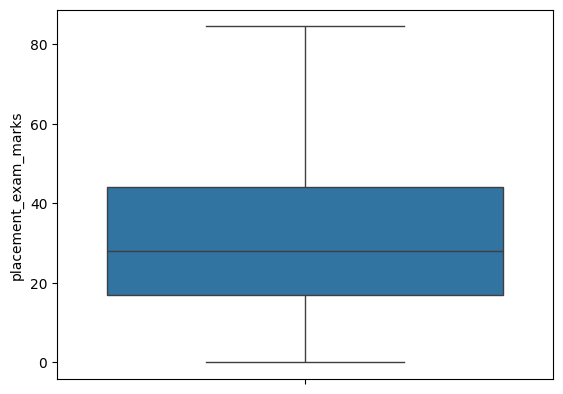

In [19]:
sns.boxplot(new_df_cap['placement_exam_marks'])